In [1]:
# from google.colab import drive
# drive.mount("/content/gdrive", force_remount=True)

In [2]:
# !pip install findspark

In [3]:
# !chmod +x /content/gdrive/MyDrive/DL06_K303_ONLINE_VoQuocHung/spark-3.5.1-bin-hadoop3/bin/*

In [4]:
# import os
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/gdrive/MyDrive/DL06_K303_ONLINE_VoQuocHung/spark-3.5.1-bin-hadoop3"

In [5]:
# import findspark
# findspark.init()

In [6]:
import pandas as pd
import numpy as np
import re
import regex
import string
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import warnings
warnings.filterwarnings('ignore')

In [7]:
def highlight_row(row):
    if row['Model'] == 'Logistic Regression':  # đổi điều kiện nếu muốn
        return ['background-color: #ffcccc'] * len(row)
    else:
        return [''] * len(row)

# ĐỌC FILE

In [8]:
df_Company = pd.read_excel('Overview_Companies.xlsx', index_col='id')
df_Reviews = pd.read_excel('Reviews.xlsx', index_col='id')

In [9]:
data = df_Reviews.merge(df_Company, on='Company Name', how='left')
# data = pd.concat([df_Company, df_Reviews], axis=1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8416
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Company Name                  8417 non-null   object
 1   Cmt_day                       8417 non-null   object
 2   Title                         8417 non-null   object
 3   What I liked                  8416 non-null   object
 4   Suggestions for improvement   8412 non-null   object
 5   Rating                        8417 non-null   int64 
 6   Salary & benefits             8417 non-null   int64 
 7   Training & learning           8417 non-null   int64 
 8   Management cares about me     8417 non-null   int64 
 9   Culture & fun                 8417 non-null   int64 
 10  Office & workspace            8417 non-null   int64 
 11  Recommend?                    8417 non-null   object
 12  Company Type                  8417 non-null   object
 13  Company industry  

In [11]:
data.head(3)

,Company Name,Cmt_day,Title,What I liked,Suggestions for improvement,Rating,Salary & benefits,Training & learning,Management cares about me,Culture & fun,...,Company industry,Company size,Country,Working days,Overtime Policy,Company overview,Our key skills,Why you'll love working here,Location,Href
0,Accenture,March 2025,"Môi trường thoải mái, ít áp lực, có thể làm vi...","Môi trường thoải mái, ít áp lực, có thể làm vi...",Cần đánh giá KPI khách quan và phân chia công ...,4,4,4,4,4,...,IT Services and IT Consulting,301-500 employees,Vietnam,Monday - Friday,No OT,A global professional services company with le...,Our Key Skills\nCloud\nLinux\nDevOps\nNetworki...,Hybrid working\nWonderful and Human focus Envi...,"{'Ho Chi Minh': ['9th Floor, Viettel Tower, 28...",https://itviec.com/companies/accenture\n
1,Accenture,January 2025,Công ty trẻ trung năng động,"Cơ sở vật chất đẹp, công ty trẻ trung năng độn...",Nên nghiên cứu lại range lương của thì trường....,4,3,4,4,4,...,IT Services and IT Consulting,301-500 employees,Vietnam,Monday - Friday,No OT,A global professional services company with le...,Our Key Skills\nCloud\nLinux\nDevOps\nNetworki...,Hybrid working\nWonderful and Human focus Envi...,"{'Ho Chi Minh': ['9th Floor, Viettel Tower, 28...",https://itviec.com/companies/accenture\n
2,Accenture,October 2023,Môi trường làm việc thoải mái vui vẻ,"Mội người thân thiện, giúp đỡ lẫn nhau. Chương...",Do công ty làm outsourcing về mảng system nên ...,3,3,3,3,3,...,IT Services and IT Consulting,301-500 employees,Vietnam,Monday - Friday,No OT,A global professional services company with le...,Our Key Skills\nCloud\nLinux\nDevOps\nNetworki...,Hybrid working\nWonderful and Human focus Envi...,"{'Ho Chi Minh': ['9th Floor, Viettel Tower, 28...",https://itviec.com/companies/accenture\n


In [12]:
data.columns = data.columns.str.replace("’","'")

In [13]:
data.shape

(8417, 23)

In [14]:
data.isnull().sum().sort_values(ascending= False)

Overtime Policy                 530
Company industry                293
Our key skills                   51
Suggestions for improvement       5
What I liked                      1
Company Name                      0
Location                          0
Why you'll love working here      0
Company overview                  0
Working days                      0
Country                           0
Company size                      0
Recommend?                        0
Company Type                      0
Cmt_day                           0
Office & workspace                0
Culture & fun                     0
Management cares about me         0
Training & learning               0
Salary & benefits                 0
Rating                            0
Title                             0
Href                              0
dtype: int64

In [15]:
data.columns[data.isnull().any()]

Index(['What I liked', 'Suggestions for improvement', 'Company industry',
       'Overtime Policy', 'Our key skills'],
      dtype='object')

In [16]:
for col in ['Company industry','Working days', 'Overtime Policy','Our key skills']:
    mode_val = data[col].mode()
    if  not mode_val.empty:
        data[col] = data[col].fillna(mode_val[0])

In [17]:
data.dropna(subset=['What I liked','Suggestions for improvement'],inplace=True)

In [18]:
data.isnull().sum()

Company Name                    0
Cmt_day                         0
Title                           0
What I liked                    0
Suggestions for improvement     0
Rating                          0
Salary & benefits               0
Training & learning             0
Management cares about me       0
Culture & fun                   0
Office & workspace              0
Recommend?                      0
Company Type                    0
Company industry                0
Company size                    0
Country                         0
Working days                    0
Overtime Policy                 0
Company overview                0
Our key skills                  0
Why you'll love working here    0
Location                        0
Href                            0
dtype: int64

In [19]:
data.head(3)

,Company Name,Cmt_day,Title,What I liked,Suggestions for improvement,Rating,Salary & benefits,Training & learning,Management cares about me,Culture & fun,...,Company industry,Company size,Country,Working days,Overtime Policy,Company overview,Our key skills,Why you'll love working here,Location,Href
0,Accenture,March 2025,"Môi trường thoải mái, ít áp lực, có thể làm vi...","Môi trường thoải mái, ít áp lực, có thể làm vi...",Cần đánh giá KPI khách quan và phân chia công ...,4,4,4,4,4,...,IT Services and IT Consulting,301-500 employees,Vietnam,Monday - Friday,No OT,A global professional services company with le...,Our Key Skills\nCloud\nLinux\nDevOps\nNetworki...,Hybrid working\nWonderful and Human focus Envi...,"{'Ho Chi Minh': ['9th Floor, Viettel Tower, 28...",https://itviec.com/companies/accenture\n
1,Accenture,January 2025,Công ty trẻ trung năng động,"Cơ sở vật chất đẹp, công ty trẻ trung năng độn...",Nên nghiên cứu lại range lương của thì trường....,4,3,4,4,4,...,IT Services and IT Consulting,301-500 employees,Vietnam,Monday - Friday,No OT,A global professional services company with le...,Our Key Skills\nCloud\nLinux\nDevOps\nNetworki...,Hybrid working\nWonderful and Human focus Envi...,"{'Ho Chi Minh': ['9th Floor, Viettel Tower, 28...",https://itviec.com/companies/accenture\n
2,Accenture,October 2023,Môi trường làm việc thoải mái vui vẻ,"Mội người thân thiện, giúp đỡ lẫn nhau. Chương...",Do công ty làm outsourcing về mảng system nên ...,3,3,3,3,3,...,IT Services and IT Consulting,301-500 employees,Vietnam,Monday - Friday,No OT,A global professional services company with le...,Our Key Skills\nCloud\nLinux\nDevOps\nNetworki...,Hybrid working\nWonderful and Human focus Envi...,"{'Ho Chi Minh': ['9th Floor, Viettel Tower, 28...",https://itviec.com/companies/accenture\n


In [20]:
data.columns

Index(['Company Name', 'Cmt_day', 'Title', 'What I liked',
       'Suggestions for improvement', 'Rating', 'Salary & benefits',
       'Training & learning', 'Management cares about me', 'Culture & fun',
       'Office & workspace', 'Recommend?', 'Company Type', 'Company industry',
       'Company size', 'Country', 'Working days', 'Overtime Policy',
       'Company overview', 'Our key skills', 'Why you'll love working here',
       'Location', 'Href'],
      dtype='object')

In [21]:
df_employees = df_Company.value_counts('Company size').reset_index()
df_employees.columns = ['Company size','count']
df_employees

,Company size,count
0,1-50 employees,178
1,51-150 employees,138
2,1000+ employees,54
3,151-300 employees,51
4,301-500 employees,33
5,501-1000 employees,24


In [22]:
fig = px.pie(df_employees, values='count', names='Company size',title='Biểu đồ Phân bố qui mô số lượng người')
fig.update_traces(text=df_employees['Company size'], textposition='outside')
fig.update_layout(margin=dict(t=60, l=0, r=0, b=80),
                      title_font_size=20,
                      title_font_color='Red',
                      height = 500)
fig.show()
#  st.plotly_chart(fig, use_container_width=True)
# Lưu biểu đồ thành ảnh
fig.write_image("img/c1_nhansu.png")

In [23]:
df_country = df_Company.value_counts('Country').reset_index()
df_country.columns = ['Country','count']
top_10_country = df_country.head(10)
top_10_country

,Country,count
0,Vietnam,259
1,United States,45
2,Japan,41
3,Singapore,32
4,South Korea,20
5,Australia,12
6,France,9
7,Germany,8
8,United Kingdom,8
9,Switzerland,8


In [24]:
fig = px.pie(top_10_country, values='count', names='Country',title='Biểu đồ Phân bố các quốc gia') #hole= 0.2)
fig.update_traces(text=top_10_country['Country'], textposition='outside')
fig.update_layout(margin=dict(t=60, l=0, r=0, b=80),
                      title_font_size=24,height=500,
                      title_font_color='Red') 
fig.show()

In [25]:
df_working = df_Company.value_counts('Working days').reset_index()
df_working.columns = ['Working days','count']
df_working

,Working days,count
0,Monday - Friday,449
1,Monday - Saturday,27


In [26]:
fig = px.pie(df_working, values='count', names='Working days',title='Biểu đồ thời gian làm việc')
fig.update_traces(text=df_working['Working days'], textposition='outside',rotation=90,)
fig.update_layout(margin=dict(t=80, l=0, r=0, b=80),height=500,
                      title_font_size=24, title_font_color='Red')
fig.show()

In [27]:
df_ot = df_Company.value_counts('Overtime Policy').reset_index()
df_ot.columns = ['Overtime Policy','count']
df_ot

,Overtime Policy,count
0,No OT,389
1,Extra salary for OT,52
2,Extra days off for OT,5
3,OT included in base salary,1


In [28]:
fig = px.pie(df_ot, values='count', names='Overtime Policy',title='Biểu đồ thể hiện có làm việc OT không')
fig.update_traces(text=df_ot['Overtime Policy'], textposition='outside',rotation=90,)
fig.update_layout(margin=dict(t=60, l=0, r=0, b=80),height=500,
                      title_font_size=24, title_font_color='Red')
fig.show()

# Xây dựng model bằng sklearn

In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score,roc_auc_score

In [30]:
X = data[['Company size', 'Country','Working days','Overtime Policy',
'Rating', 'Salary & benefits','Training & learning','Management cares about me',
'Culture & fun','Office & workspace']].copy()

In [31]:
data['Recommend?'] = np.where(data['Recommend?'] == 'Yes',1,0 )

In [32]:
y = data['Recommend?']

In [33]:
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

In [34]:
X

,Company size,Country,Working days,Overtime Policy,Rating,Salary & benefits,Training & learning,Management cares about me,Culture & fun,Office & workspace
0,3,20,0,2,4,4,4,4,4,4
1,3,20,0,2,4,3,4,4,4,5
2,3,20,0,2,3,3,3,3,3,3
3,3,20,0,2,3,2,2,3,4,4
4,3,20,0,2,4,3,4,4,4,3
...,...,...,...,...,...,...,...,...,...,...
8412,1,16,0,2,4,4,4,5,5,3
8413,1,16,0,2,4,4,5,5,4,4
8414,1,16,0,2,5,5,5,5,5,5
8415,1,16,0,2,5,4,5,4,4,4


In [35]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.3)

In [36]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'DecisionTree':DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [37]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # cần cho ROC AUC

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    })

In [38]:
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='F1-Score', ascending=False)
print(df_results)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0  Logistic Regression  0.942948   0.952422  0.984794  0.968338  0.944332
3              XGBoost  0.931458   0.950633  0.973166  0.961768  0.930683
2        Random Forest  0.931458   0.954606  0.968694  0.961598  0.916345
1         DecisionTree  0.906894   0.949663  0.944991  0.947321  0.802700


In [39]:
# Áp dụng style và hiển thị
styled_df = df_results.style.apply(highlight_row, axis=1)
display(styled_df)
# dùng câu này cho streamlit
# st.dataframe(styled_df, use_container_width=True)


,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.942948,0.952422,0.984794,0.968338,0.944332
3,XGBoost,0.931458,0.950633,0.973166,0.961768,0.930683
2,Random Forest,0.931458,0.954606,0.968694,0.961598,0.916345
1,DecisionTree,0.906894,0.949663,0.944991,0.947321,0.802700


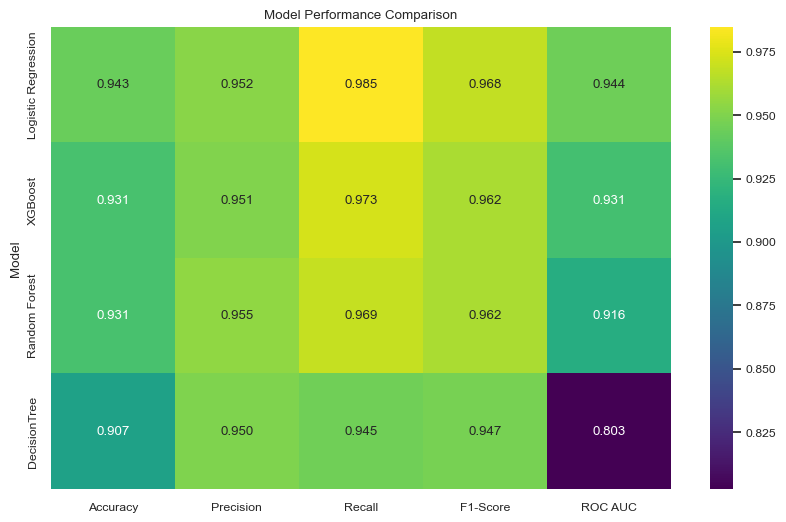

In [40]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=0.8)
sns.heatmap(df_results.set_index('Model'), annot=True, fmt=".3f", cmap="viridis")
plt.title("Model Performance Comparison")
plt.show()

In [41]:
# Vẽ lưới dạng pie
plt.figure(figsize=(15, 6))
fig = go.Figure(data=[go.Table(
    header=dict(values=list(df_results.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[df_results[col] for col in df_results.columns],
               fill_color='lavender',
               align='left'))
])
fig.update_layout(title="Baseline ")
fig.show()
plt.show()

<Figure size 1500x600 with 0 Axes>

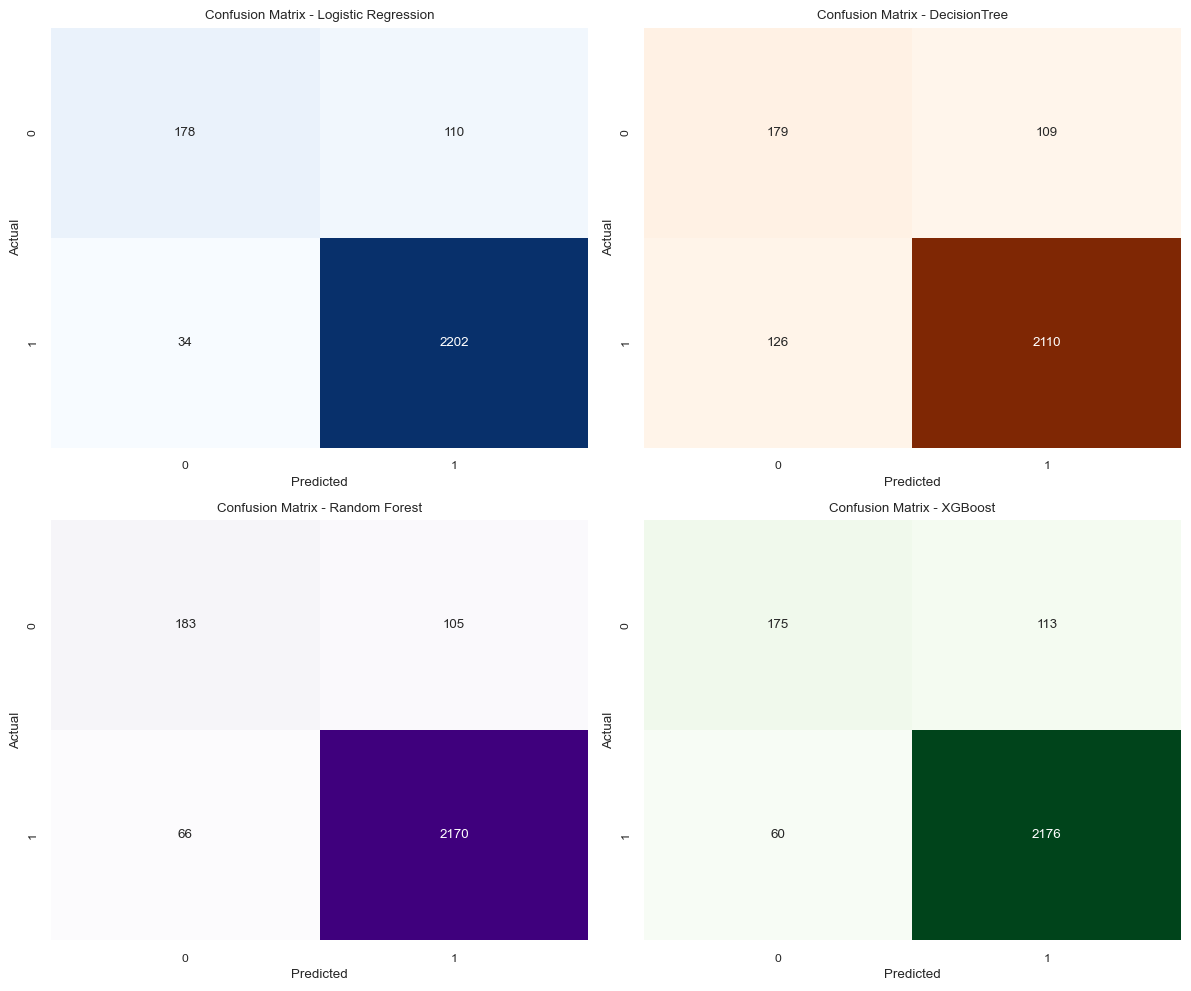

In [42]:
# Danh sách màu sắc cmap tương ứng (đủ 4 màu đẹp và khác nhau)
colormaps = ['Blues', 'Oranges', 'Purples', 'Greens']

# Tạo figure và axes cho 2 hàng 2 cột
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten axes để dễ truy cập
axes = axes.flatten()

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Vẽ confusion matrix lên subplot tương ứng
    sns.heatmap(cm, annot=True, fmt='d', cmap=colormaps[i], cbar=False, ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()

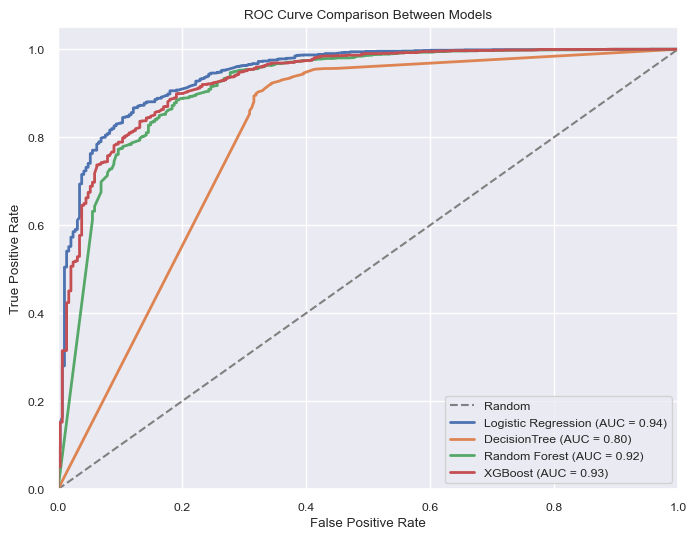

In [43]:
plt.figure(figsize=(8, 6))  # Tạo 1 biểu đồ

# Đường chéo random model (chỉ vẽ 1 lần)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')

for name, model in models.items():
    model.fit(X_train, y_train)

    # Lấy xác suất dự đoán lớp 1
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    # Tính FPR, TPR, AUC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # Vẽ đường ROC
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Cài đặt biểu đồ
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison Between Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


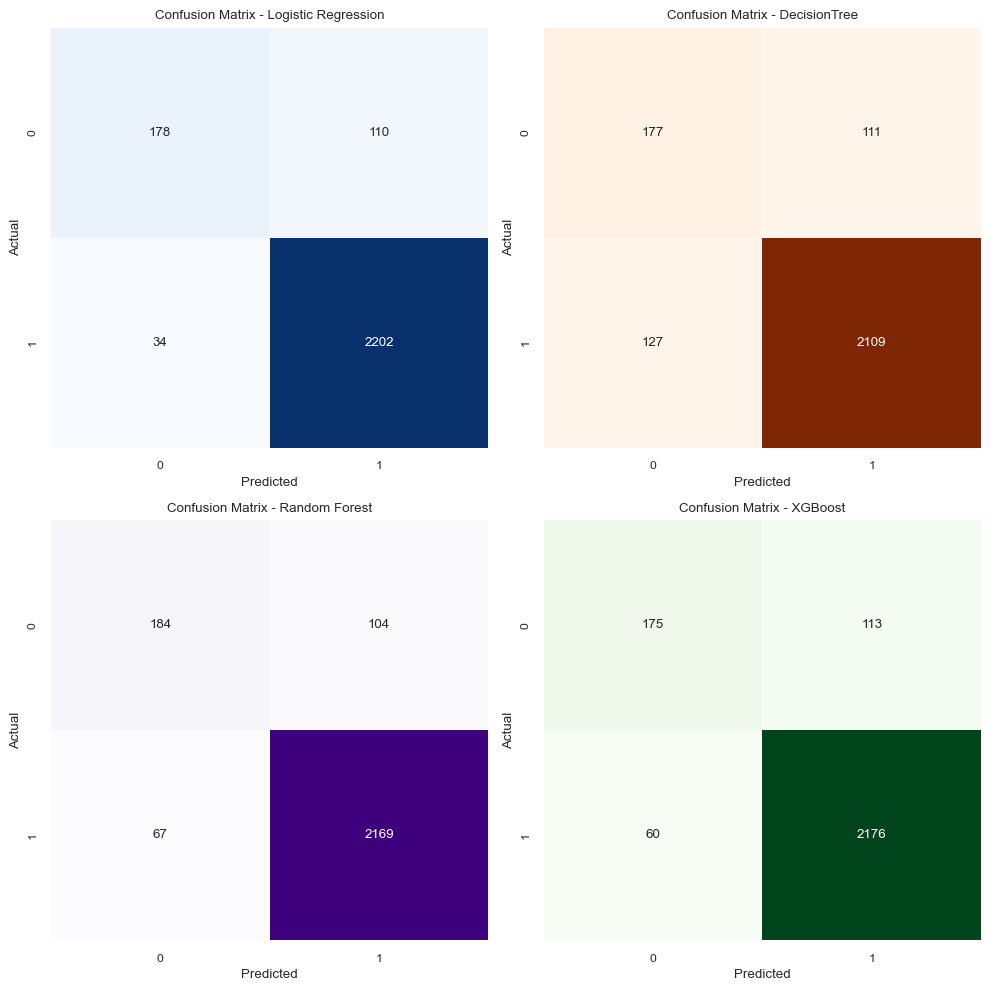

In [44]:
# Danh sách màu sắc cmap tương ứng (đủ 5 màu đẹp và khác nhau)
colormaps = ['Blues', 'Oranges', 'Purples', 'Greens']
plt.figure(figsize=(10, 10))
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Vẽ từng confusion matrix
    plt.subplot(2, 2, i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap=colormaps[i], cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

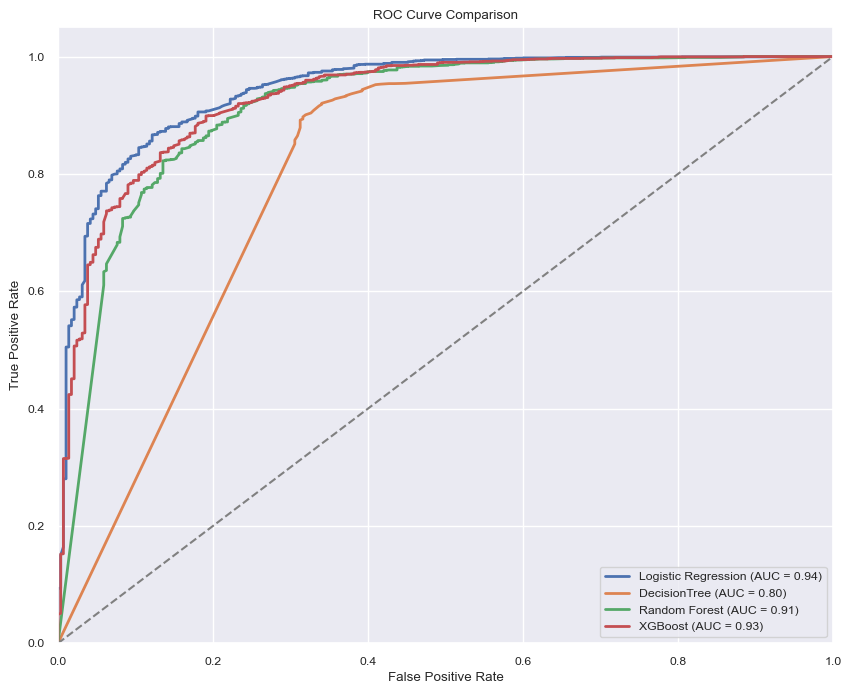

In [45]:
plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train, y_train)

    # Lấy xác suất dự đoán lớp 1
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    # Tính FPR, TPR, AUC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Đường chéo random model
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [54]:
# LƯU MODEL
import pickle
# Lưu
           
logistic_model = models['Logistic Regression']
pkl_filename = "logistic_model.pkl"  
# Lưu model và label_encoders
with open(pkl_filename, 'wb') as f:  
    pickle.dump(logistic_model, f)

In [47]:
X.index.name ='index'
y.index.name ='index'

In [48]:
data_pd = X.merge(y , on ='index', how='left')

# Làm việc với spark

In [49]:
# import libraries
from pyspark import SparkContext
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
from pyspark.sql.functions import *
from pyspark.sql import types
from pyspark.sql import functions as F
from pyspark.sql.types import DateType

from pyspark.ml.feature import Binarizer
from pyspark.ml.feature import Bucketizer
from pyspark.ml.feature import OneHotEncoder, StringIndexer

from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import LogisticRegressionModel

from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import DecisionTreeClassificationModel

from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import RandomForestClassificationModel

from pyspark.ml.classification import GBTClassifier
from pyspark.ml.classification import GBTClassificationModel

from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

In [50]:
SparkContext.setSystemProperty('spark.hadoop.dfs.client.use.datanode.hostname', 'true')
sc = SparkContext(master="local", appName="Classification Home Loan Approval or not")
sc

<SparkContext master=local appName=Classification Home Loan Approval or not>

In [51]:
spark = SparkSession(sc)
spark

In [52]:
data_spark = spark.createDataFrame(data_pd)

In [53]:
data_spark.show(5)

Py4JJavaError: An error occurred while calling o53.showString.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 0.0 failed 1 times, most recent failure: Lost task 0.0 in stage 0.0 (TID 0) (MTRAN.lan executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:834)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/java.net.PlainSocketImpl.waitForNewConnection(Native Method)
	at java.base/java.net.PlainSocketImpl.socketAccept(PlainSocketImpl.java:163)
	at java.base/java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:474)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:551)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:519)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 32 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:530)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:483)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:61)
	at org.apache.spark.sql.Dataset.collectFromPlan(Dataset.scala:4332)
	at org.apache.spark.sql.Dataset.$anonfun$head$1(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$2(Dataset.scala:4322)
	at org.apache.spark.sql.execution.QueryExecution$.withInternalError(QueryExecution.scala:546)
	at org.apache.spark.sql.Dataset.$anonfun$withAction$1(Dataset.scala:4320)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$6(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:201)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:108)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:900)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:66)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:4320)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:3314)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:3537)
	at org.apache.spark.sql.Dataset.getRows(Dataset.scala:280)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:315)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:834)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:203)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:109)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:124)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:174)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:67)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:367)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:331)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	... 1 more
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.base/java.net.PlainSocketImpl.waitForNewConnection(Native Method)
	at java.base/java.net.PlainSocketImpl.socketAccept(PlainSocketImpl.java:163)
	at java.base/java.net.AbstractPlainSocketImpl.accept(AbstractPlainSocketImpl.java:474)
	at java.base/java.net.ServerSocket.implAccept(ServerSocket.java:551)
	at java.base/java.net.ServerSocket.accept(ServerSocket.java:519)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:190)
	... 32 more


# Chuẩn hóa dữ liệu

In [ ]:
# Tạo ra các cột indexer
data_indexed = StringIndexer(inputCol='Company size', outputCol='Company_size_idx').fit(data_spark).transform(data_spark)
data_indexed = StringIndexer(inputCol='Country', outputCol='Country_idx').fit(data_indexed).transform(data_indexed)
data_indexed = StringIndexer(inputCol='Working days', outputCol='Working_days_idx').fit(data_indexed).transform(data_indexed)
data_indexed = StringIndexer(inputCol='Overtime Policy', outputCol='Overtime_Policy_idx').fit(data_indexed).transform(data_indexed)
data_indexed = StringIndexer(inputCol='Rating', outputCol='Rating_idx').fit(data_indexed).transform(data_indexed)
data_indexed = StringIndexer(inputCol='Salary & benefits', outputCol='Salary_benefits_idx').fit(data_indexed).transform(data_indexed)
data_indexed = StringIndexer(inputCol='Training & learning', outputCol='Training_learning_idx').fit(data_indexed).transform(data_indexed)
data_indexed = StringIndexer(inputCol='Management cares about me', outputCol='Management_cares_about_me_idx').fit(data_indexed).transform(data_indexed)
data_indexed = StringIndexer(inputCol='Culture & fun', outputCol='Culture_fun_idx').fit(data_indexed).transform(data_indexed)
data_indexed = StringIndexer(inputCol='Office & workspace', outputCol='Office_workspace_idx').fit(data_indexed).transform(data_indexed)

data_indexed = StringIndexer(inputCol='Recommend?', outputCol='label').fit(data_indexed).transform(data_indexed)

In [ ]:
data_indexed.show(5)

+------------+-------+------------+---------------+------+-----------------+-------------------+-------------------------+-------------+------------------+----------+----------------+-----------+----------------+-------------------+----------+-------------------+---------------------+-----------------------------+---------------+--------------------+-----+
|Company size|Country|Working days|Overtime Policy|Rating|Salary & benefits|Training & learning|Management cares about me|Culture & fun|Office & workspace|Recommend?|Company_size_idx|Country_idx|Working_days_idx|Overtime_Policy_idx|Rating_idx|Salary_benefits_idx|Training_learning_idx|Management_cares_about_me_idx|Culture_fun_idx|Office_workspace_idx|label|
+------------+-------+------------+---------------+------+-----------------+-------------------+-------------------------+-------------+------------------+----------+----------------+-----------+----------------+-------------------+----------+-------------------+-------------------

In [ ]:
# Tạo các OneHotEncoder
data_indexed = OneHotEncoder(inputCol='Company_size_idx', outputCol='Company_size_vec').fit(data_indexed).transform(data_indexed)
data_indexed = OneHotEncoder(inputCol='Country_idx', outputCol='Country_vec').fit(data_indexed).transform(data_indexed)
data_indexed = OneHotEncoder(inputCol='Working_days_idx', outputCol='Working_days_vec').fit(data_indexed).transform(data_indexed)
data_indexed = OneHotEncoder(inputCol='Overtime_Policy_idx', outputCol='Overtime_Policy_vec').fit(data_indexed).transform(data_indexed)
data_indexed = OneHotEncoder(inputCol='Rating_idx', outputCol='Rating_vec').fit(data_indexed).transform(data_indexed)
data_indexed = OneHotEncoder(inputCol='Salary_benefits_idx', outputCol='Salary_benefits_vec').fit(data_indexed).transform(data_indexed)
data_indexed = OneHotEncoder(inputCol='Training_learning_idx', outputCol='Training_learning_vec').fit(data_indexed).transform(data_indexed)
data_indexed = OneHotEncoder(inputCol='Management_cares_about_me_idx', outputCol='Management_cares_about_me_vec').fit(data_indexed).transform(data_indexed)
data_indexed = OneHotEncoder(inputCol='Culture_fun_idx', outputCol='Culture_fun_vec').fit(data_indexed).transform(data_indexed)
data_indexed = OneHotEncoder(inputCol='Office_workspace_idx', outputCol='Office_workspace_vec').fit(data_indexed).transform(data_indexed)

In [ ]:
data_indexed.show(5)

+------------+-------+------------+---------------+------+-----------------+-------------------+-------------------------+-------------+------------------+----------+----------------+-----------+----------------+-------------------+----------+-------------------+---------------------+-----------------------------+---------------+--------------------+-----+----------------+--------------+----------------+-------------------+-------------+-------------------+---------------------+-----------------------------+---------------+--------------------+
|Company size|Country|Working days|Overtime Policy|Rating|Salary & benefits|Training & learning|Management cares about me|Culture & fun|Office & workspace|Recommend?|Company_size_idx|Country_idx|Working_days_idx|Overtime_Policy_idx|Rating_idx|Salary_benefits_idx|Training_learning_idx|Management_cares_about_me_idx|Culture_fun_idx|Office_workspace_idx|label|Company_size_vec|   Country_vec|Working_days_vec|Overtime_Policy_vec|   Rating_vec|Salary_b

In [ ]:
data_indexed.columns

['Company size',
 'Country',
 'Working days',
 'Overtime Policy',
 'Rating',
 'Salary & benefits',
 'Training & learning',
 'Management cares about me',
 'Culture & fun',
 'Office & workspace',
 'Recommend?',
 'Company_size_idx',
 'Country_idx',
 'Working_days_idx',
 'Overtime_Policy_idx',
 'Rating_idx',
 'Salary_benefits_idx',
 'Training_learning_idx',
 'Management_cares_about_me_idx',
 'Culture_fun_idx',
 'Office_workspace_idx',
 'label',
 'Company_size_vec',
 'Country_vec',
 'Working_days_vec',
 'Overtime_Policy_vec',
 'Rating_vec',
 'Salary_benefits_vec',
 'Training_learning_vec',
 'Management_cares_about_me_vec',
 'Culture_fun_vec',
 'Office_workspace_vec']

In [ ]:
# Assembling columns
assembler = VectorAssembler(inputCols=['Company_size_vec',
                                      'Country_vec',
                                      'Working_days_vec',
                                      'Overtime_Policy_vec',
                                      'Rating_vec',
                                      'Salary_benefits_vec',
                                      'Training_learning_vec',
                                      'Management_cares_about_me_vec',
                                      'Culture_fun_vec',
                                      'Office_workspace_vec'],
                            outputCol='features')


In [ ]:
data_pre = assembler.transform(data_indexed)

In [ ]:
data_pre.select('features','label').show(5, truncate= False)

+----------------------------------------------------------------------------+-----+
|features                                                                    |label|
+----------------------------------------------------------------------------+-----+
|(52,[3,5,25,26,29,32,36,41,45,49],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|0.0  |
|(52,[3,5,25,26,29,34,36,41,45,48],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|0.0  |
|(52,[3,5,25,26,30,34,38,42,46,50],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|0.0  |
|(52,[3,5,25,26,30,35,39,42,45,49],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|1.0  |
|(52,[3,5,25,26,29,34,36,41,45,50],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|0.0  |
+----------------------------------------------------------------------------+-----+
only showing top 5 rows



In [ ]:
final_data = data_pre.select('features','label')
final_data.count()

8411

# Chia dữ liệu train, test

In [ ]:
training, test_data = final_data.randomSplit([0.8, 0.2])

In [ ]:
training.describe().show()

+-------+-------------------+
|summary|              label|
+-------+-------------------+
|  count|               6781|
|   mean|0.12387553458192008|
| stddev| 0.3294637976251752|
|    min|                0.0|
|    max|                1.0|
+-------+-------------------+



In [ ]:
test_data.describe().show()

+-------+------------------+
|summary|             label|
+-------+------------------+
|  count|              1630|
|   mean|0.1147239263803681|
| stddev|0.3187862819099823|
|    min|               0.0|
|    max|               1.0|
+-------+------------------+



# Xây dựng các Model

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(featuresCol='features',labelCol='label', predictionCol='prediction'),
    'DecisionTree':DecisionTreeClassifier(featuresCol='features',labelCol='label', predictionCol='prediction'),
    'Random Forest': RandomForestClassifier(featuresCol='features',labelCol='label', predictionCol='prediction'),
    "Gradient Boosted Tree": GBTClassifier(featuresCol='features',labelCol='label', predictionCol='prediction')
}

In [ ]:
results = []

# Các evaluator
acc_eval = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='accuracy')
prec_eval = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='weightedPrecision')
rec_eval = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='weightedRecall')
f1_eval = MulticlassClassificationEvaluator(labelCol='label', predictionCol='prediction', metricName='f1')
auc_eval = BinaryClassificationEvaluator(labelCol='label', rawPredictionCol='rawPrediction', metricName='areaUnderROC')

for name, model in models.items():
    fitted_model = model.fit(training)
    predictions = fitted_model.transform(test_data)

    results.append({
        'Model': name,
        'Accuracy': acc_eval.evaluate(predictions),
        'Precision': prec_eval.evaluate(predictions),
        'Recall': rec_eval.evaluate(predictions),
        'F1-Score': f1_eval.evaluate(predictions),
        'ROC AUC': auc_eval.evaluate(predictions)
    })


In [ ]:
result_spark = pd.DataFrame(results)

print(df_results)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0  Logistic Regression  0.933439   0.940874  0.986523  0.963158  0.938907
3              XGBoost  0.931854   0.943437  0.981581  0.962131  0.917874
2        Random Forest  0.929081   0.945581  0.975741  0.960424  0.899620
1         DecisionTree  0.910460   0.948029  0.950584  0.949305  0.788062


In [ ]:
pd.DataFrame(results)

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.939264,0.936043,0.939264,0.933325,0.951920
1,DecisionTree,0.936196,0.931717,0.936196,0.931399,0.842470
2,Random Forest,0.923926,0.920941,0.923926,0.910598,0.935655
3,Gradient Boosted Tree,0.938650,0.934813,0.938650,0.933414,0.947306


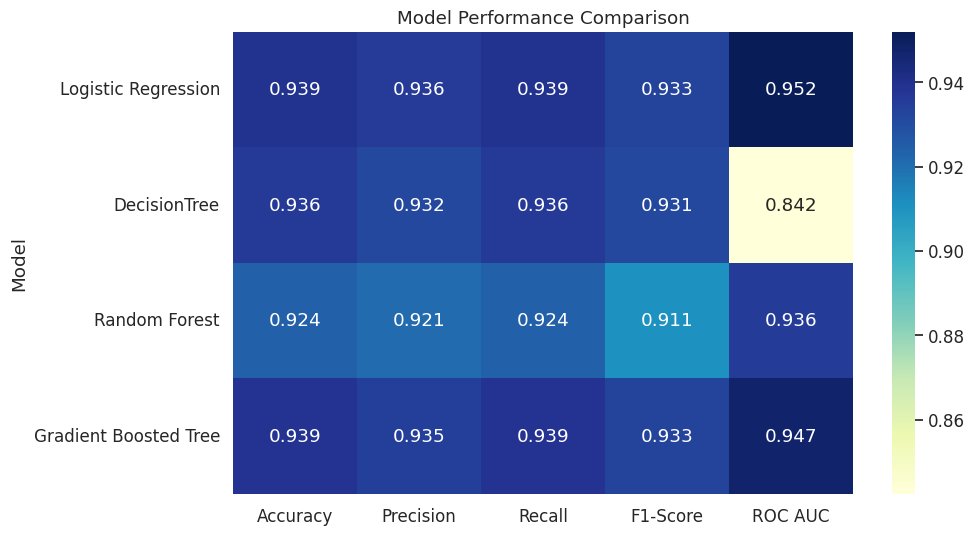

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.1)
sns.heatmap(result_spark.set_index('Model'), annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Model Performance Comparison")
plt.show()

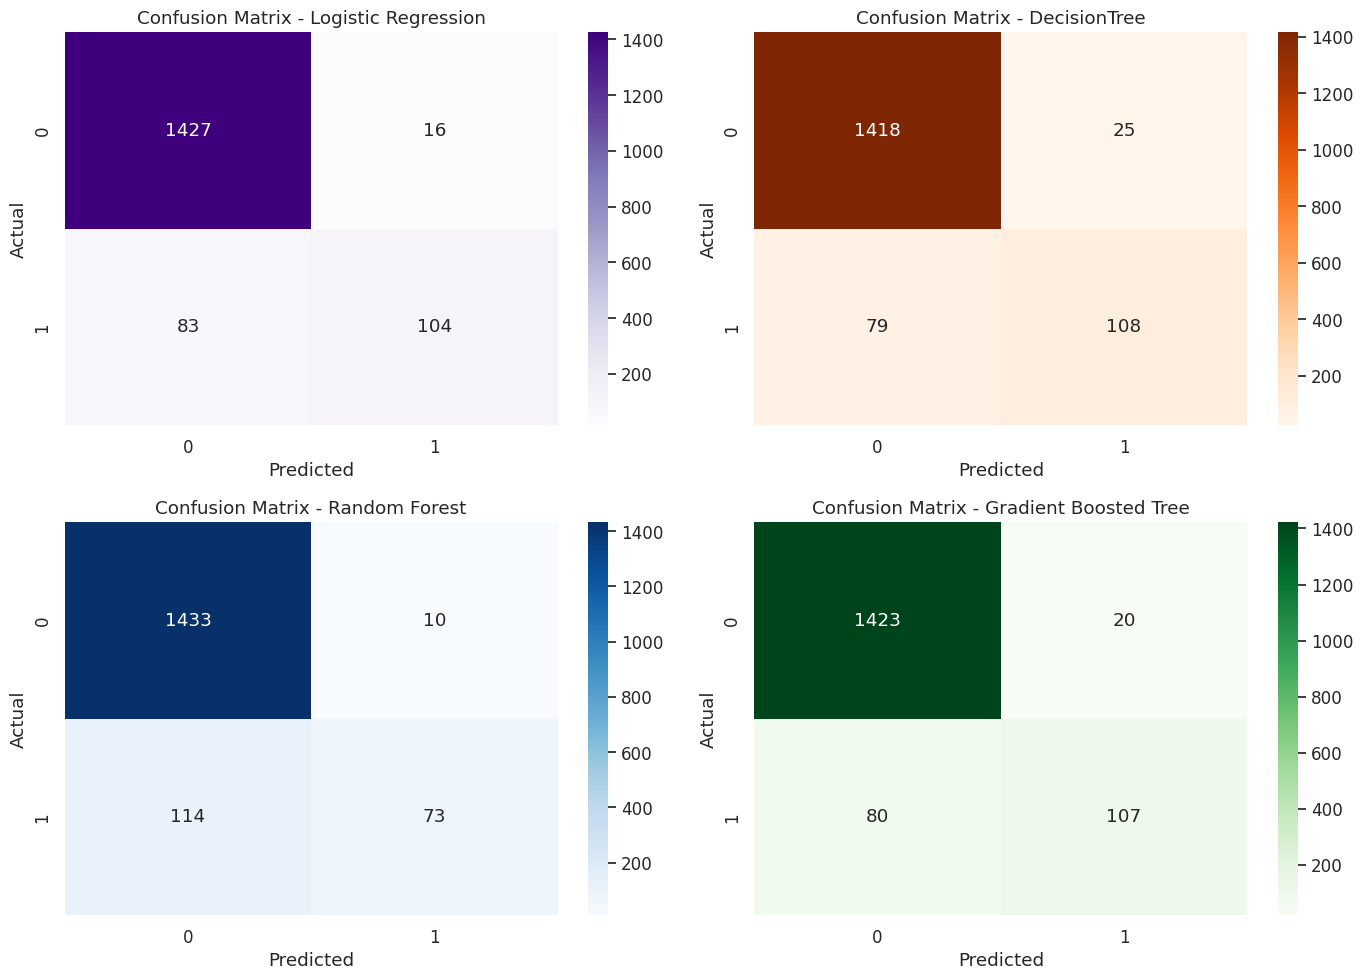

In [ ]:
# Danh sách màu sắc cmap tương ứng (đủ 5 màu đẹp và khác nhau)
colormaps = ['Purples', 'Oranges', 'Blues', 'Greens']

# Vẽ confusion matrix cho từng mô hình
plt.figure(figsize=(14, 10))

for i, (name, model) in enumerate(models.items()):
    # Huấn luyện
    fitted_model = model.fit(training)
    predictions = fitted_model.transform(test_data)

    # Chuyển sang Pandas
    y_true = predictions.select('label').toPandas()
    y_pred = predictions.select('prediction').toPandas()

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # cbar=False
    # Vẽ
    plt.subplot(2, 2, i+1)
    sns.heatmap(cm, annot=True, fmt='d', cmap=colormaps[i])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()


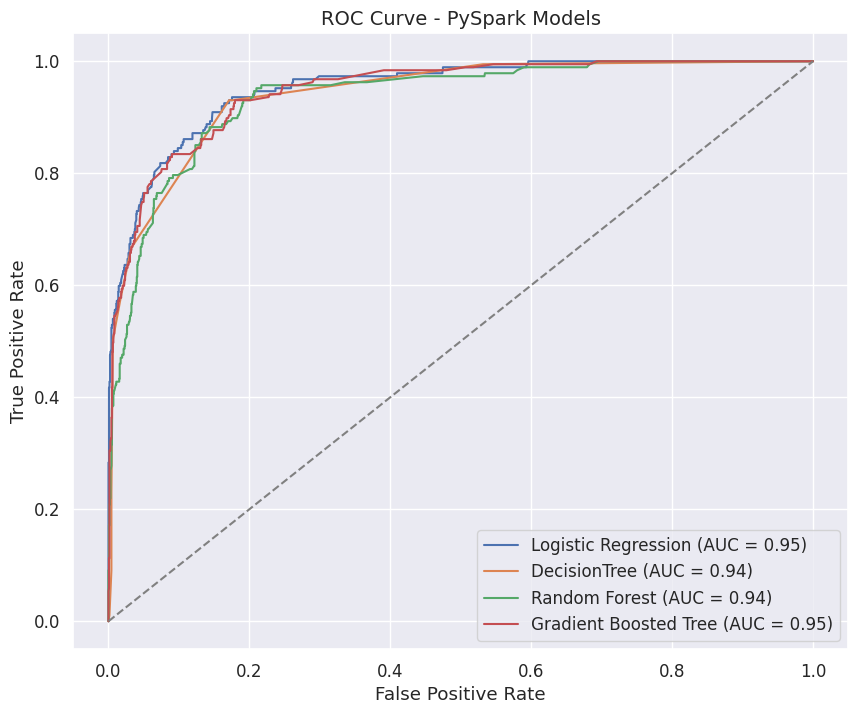

In [ ]:
plt.figure(figsize=(10, 8))

for name, model in models.items():
    fitted = model.fit(training)
    predictions = fitted.transform(test_data)
# Chuyển sang Pandas để tính ROC
    pred_pd = predictions.select('label', 'probability').toPandas()
    y_true = pred_pd['label']

    # Xác suất lớp 1 (probability là vector)
    y_score = pred_pd['probability'].apply(lambda x: float(x[1]))

    # Tính ROC
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Đường baseline (ngẫu nhiên)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title("ROC Curve - PySpark Models", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Lưu model Logictis

In [ ]:
base_path = "/content/gdrive/MyDrive/DL07/Project2/models/"

# Lưu từng mô hình
for name, model in models.items():
    # Huấn luyện mô hình
    fitted_model = model.fit(training)

    # Tạo đường dẫn lưu, ví dụ: models/Logistic Regression
    model_path = f"{base_path}{name.replace(' ', '_')}"

    # Lưu mô hình
    fitted_model.save(model_path)

    print(f"Đã lưu mô hình {name} tại: {model_path}")


Đã lưu mô hình Logistic Regression tại: /content/gdrive/MyDrive/DL07/Project2/models/Logistic_Regression
Đã lưu mô hình DecisionTree tại: /content/gdrive/MyDrive/DL07/Project2/models/DecisionTree
Đã lưu mô hình Random Forest tại: /content/gdrive/MyDrive/DL07/Project2/models/Random_Forest
Đã lưu mô hình Gradient Boosted Tree tại: /content/gdrive/MyDrive/DL07/Project2/models/Gradient_Boosted_Tree


In [ ]:
lr_model = LogisticRegressionModel.load("/content/gdrive/MyDrive/DL07/Project2/models/Logistic_Regression")

In [ ]:
unlabeled_data = test_data.select('features')
unlabeled_data.show(10, truncate=False)

+----------------------------------------------------------------------------+
|features                                                                    |
+----------------------------------------------------------------------------+
|(52,[0,5,25,26,28,32,36,40,44,48],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|
|(52,[0,5,25,26,28,32,36,41,44,49],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|
|(52,[0,5,25,26,28,32,36,41,45,49],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|
|(52,[0,5,25,26,28,32,36,41,45,49],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|
|(52,[0,5,25,26,28,32,37,41,44,49],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|
|(52,[0,5,25,26,28,32,37,41,46,49],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|
|(52,[0,5,25,26,28,32,38,41,44,48],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|
|(52,[0,5,25,26,28,32,38,41,45,50],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|
|(52,[0,5,25,26,28,33,36,40,44,48],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|
|(52,[0,5,25,26,28,33,36,40,44,48],[1.0,1.0,1.0,1.0,

In [ ]:
lr_Predictions = lr_model.transform(unlabeled_data)

In [ ]:
lr_Predictions[['features','probability','prediction']].show(10, False)

+----------------------------------------------------------------------------+------------------------------------------+----------+
|features                                                                    |probability                               |prediction|
+----------------------------------------------------------------------------+------------------------------------------+----------+
|(52,[0,5,25,26,28,32,36,40,44,48],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|[0.9974609369165974,0.0025390630834025707]|0.0       |
|(52,[0,5,25,26,28,32,36,41,44,49],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|[0.99449065244292,0.005509347557079991]   |0.0       |
|(52,[0,5,25,26,28,32,36,41,45,49],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|[0.994082491307455,0.005917508692545037]  |0.0       |
|(52,[0,5,25,26,28,32,36,41,45,49],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|[0.994082491307455,0.005917508692545037]  |0.0       |
|(52,[0,5,25,26,28,32,37,41,44,49],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1